한글 필요하려나

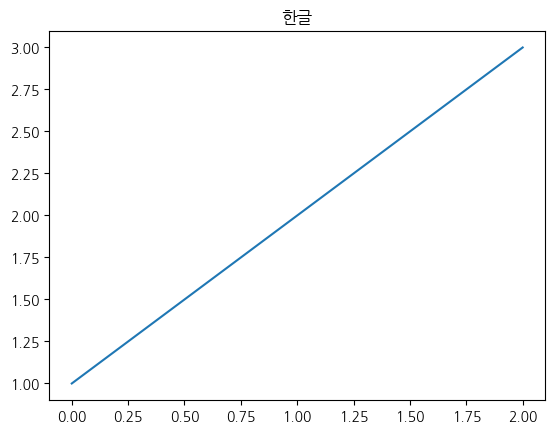

In [1]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

plt.rc("font", family="NanumGothic") # 라이브러리 불러오기와 함께 한번만 실행
from sklearn.preprocessing import MinMaxScaler, StandardScaler

plt.plot([1, 2, 3])
plt.title("한글")
plt.show()

In [2]:
# 데이터불러오기

In [3]:
import pandas as pd

df = pd.read_csv('data/울산_전처리_ver6.csv')


# 시각화 보충

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72139 entries, 0 to 72138
Data columns (total 40 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   호출부호                72139 non-null  object 
 1   입항일시                72139 non-null  object 
 2   출항일시                72139 non-null  object 
 3   접안_대기시간_분           72139 non-null  int64  
 4   출항_대기시간_분           72139 non-null  float64
 5   Service_Time_Start  72139 non-null  object 
 6   Service_Time_End    72139 non-null  object 
 7   계선장소_코드             72139 non-null  object 
 8   계선장소_숫자             72139 non-null  int64  
 9   계선장소명               72139 non-null  object 
 10  선박용도                72139 non-null  object 
 11  Service_Time_분      72139 non-null  float64
 12  대기율                 72114 non-null  float64
 13  총톤수                 61615 non-null  object 
 14  재화중량톤수              59935 non-null  object 
 15  선박제원(총길이, m)        71527 non-null  float64
 16  선박제원

In [5]:
print(df['선박용도'].value_counts())
print(df['선박용도'].value_counts().sum())

석유제품 운반선       35977
케미칼 운반선         9831
풀컨테이너선          4123
견인용예선           3799
LPG 운반선         3503
일반화물선           3314
기타 예선           1819
기타 유조선          1659
산물선(벌크선)        1520
자동차운반선          1454
원유운반선           1449
급유선             1338
시멘트운반선           531
기타선              466
케미칼가스 운반선        346
압항 예선            192
모래운반선            178
이.접안용 예선         125
철강재 운반선          114
신조선               95
폐기물 운반선           86
관공선               55
LNG 운반선           52
코일전용선             41
용달선               29
세미(혼재)컨테이너선       26
여객선                7
군함                 3
원양 어선              1
유람선                1
원목운반선              1
화객선                1
수상레저기구             1
기타 부선              1
냉동.냉장선             1
Name: 선박용도, dtype: int64
72139


In [6]:
import pandas as pd

data = {
    '선박용도': ['석유제품 운반선', '케미칼 운반선', '풀컨테이너선', '견인용예선', 'LPG 운반선', '일반화물선', '기타 예선', '기타 유조선', '산물선(벌크선)', '자동차운반선',
           '원유운반선', '급유선', '시멘트운반선', '기타선', '케미칼가스 운반선', '압항 예선', '모래운반선', '이.접안용 예선', '철강재 운반선', '신조선', '폐기물 운반선',
           '관공선', 'LNG 운반선', '코일전용선', '용달선', '세미(혼재)컨테이너선', '여객선', '군함', '원양 어선', '유람선', '원목운반선', '화객선', '수상레저기구',
           '기타 부선', '냉동.냉장선'],
    '방문수': [35977, 9831, 4123, 3799, 3503, 3314, 1819, 1659, 1520, 1454, 1449, 1338, 531, 466, 346, 192, 178, 125, 114, 95, 86, 55,
           52, 41, 29, 26, 7, 3, 1, 1, 1, 1, 1, 1, 1]
}

TD = pd.DataFrame(data)
TD


,선박용도,방문수
0,석유제품 운반선,35977
1,케미칼 운반선,9831
2,풀컨테이너선,4123
3,견인용예선,3799
4,LPG 운반선,3503
5,일반화물선,3314
6,기타 예선,1819
7,기타 유조선,1659
8,산물선(벌크선),1520
9,자동차운반선,1454


# 0.01도 안되는 애들은 삭제

In [7]:
# 비율 컬럼 추가
TD['비율'] = TD['방문수'] / TD['방문수'].sum()*100

TD.iloc[:26, :]

,선박용도,방문수,비율
0,석유제품 운반선,35977,49.871775
1,케미칼 운반선,9831,13.627857
2,풀컨테이너선,4123,5.715355
3,견인용예선,3799,5.266222
4,LPG 운반선,3503,4.855903
5,일반화물선,3314,4.593909
6,기타 예선,1819,2.521521
7,기타 유조선,1659,2.299727
8,산물선(벌크선),1520,2.107043
9,자동차운반선,1454,2.015553


# 선박용도별 대기율

In [8]:
selected_ship_types = ['석유제품 운반선', '케미칼 운반선', '풀컨테이너선', '견인용예선',
                       'LPG 운반선', '일반화물선', '기타 예선', '기타 유조선', '산물선(벌크선)',
                       '자동차운반선', '원유운반선', '급유선', '시멘트운반선', '기타선', '케미칼가스 운반선',
                       '압항 예선', '모래운반선', '이.접안용 예선', '철강재 운반선', '신조선', '폐기물 운반선',
                       '관공선', 'LNG 운반선', '코일전용선', '용달선', '세미(혼재)컨테이너선']

t_df = df[df['선박용도'].isin(selected_ship_types)]
t_df.head(3)

,호출부호,입항일시,출항일시,접안_대기시간_분,출항_대기시간_분,Service_Time_Start,Service_Time_End,계선장소_코드,계선장소_숫자,계선장소명,선박용도,Service_Time_분,대기율,총톤수,재화중량톤수,"선박제원(총길이, m)","선박제원(너비, m)",만재흘수(m),깊이(m),길이1(m),선박국적(code),선박국적(이름),ETA_Year,ETA_Month,ETA_Day,ETA_Hour,ETA_Minute,일시,풍속(m/s),풍향(deg),GUST풍속(m/s),현지기압(hPa),습도(%),기온(°C),수온(°C),최대파고(m),유의파고(m),평균파고(m),파주기(sec),파향(deg)
0,308,2020-01-05 11:30:00,2020-01-06 14:50,1125,0.0,2020-01-06 06:15:00,2020-01-06 14:50:00,MBO,1,온산1부두,산물선(벌크선),515.0,218.446602,NaN,NaN,73.2,12.5,NaN,NaN,NaN,NaN,NaN,2020,1,5,11,30,2020-01-05 11:00:00,3.1,64.0,5.1,1030.6,58.0,10.3,17.2,2.3,1.3,0.9,7.1,55.0
1,308,2020-02-27 08:50:00,2020-02-27 16:30,0,0.0,2020-02-27 08:50:00,2020-02-27 16:30:00,MB2,1,2부두 01,산물선(벌크선),460.0,0.000000,NaN,NaN,73.2,12.5,NaN,NaN,NaN,NaN,NaN,2020,2,27,8,50,2020-02-27 08:00:00,9.5,40.0,13.9,1028.0,61.0,8.9,15.0,3.0,2.2,1.5,5.8,48.0
2,308,2020-03-09 12:35:00,2020-03-12 15:40,0,0.0,2020-03-09 12:35:00,2020-03-12 15:40:00,MB1,1,1부두 01,산물선(벌크선),4505.0,0.000000,NaN,NaN,73.2,12.5,NaN,NaN,NaN,NaN,NaN,2020,3,9,12,35,2020-03-09 12:00:00,3.5,146.0,4.5,1016.8,69.0,13.8,15.0,0.7,0.5,0.4,5.3,49.0


In [9]:
merged_df = pd.merge(average_waiting_time, TD, on='선박용도', how='left')
merged_df

NameError: name 'average_waiting_time' is not defined

In [ ]:
# 비율을 기준으로 데이터프레임 정렬
df_sorted = merged_df.sort_values(by='비율')

# 선박용도별 대기율 막대그래프 생성
plt.figure(figsize=(12, 8))
plt.barh(df_sorted['선박용도'], df_sorted['대기율'])
plt.xlabel('대기율')
plt.title('선박용도별 대기율')
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 조건에 따라 데이터 분리
condition = df['선박용도'].isin(['석유제품 운반선', '케미칼 운반선', '기타 유조선', 'LPG 운반선', '원유운반선', '케미칼가스 운반선', 'LNG 운반선'])
selected_rows = df[condition]
non_selected_rows = df[~condition]

# 각각의 평균 계산
selected_mean = selected_rows['대기율'].mean()
non_selected_mean = non_selected_rows['대기율'].mean()

# 시각화
plt.figure(figsize=(7, 5))
sns.barplot(x=['액체', 'Non_액체'], y=[selected_mean, non_selected_mean])
plt.title('대기율 비교')
plt.ylabel('대기율(%)')

# 수치 표시
plt.text(0, selected_mean + 0.1, f'{selected_mean:.2f}%', ha='center', va='bottom')
plt.text(1, non_selected_mean + 0.1, f'{non_selected_mean:.2f}%', ha='center', va='bottom')

plt.show()


In [ ]:
df.describe()

# 액체화물만 불러오기
(향후 한계점에 컨테이너선이나 벌크선에도 미량이지만(0.01? 0.1퍼센트) 액체화물이 실려온다느 것을 언급정도?, 그정도면 한계점도 아니지만 자리 채울 수 있으니 좋다)

In [ ]:
condition = df['선박용도'].isin(['석유제품 운반선', '케미칼 운반선', '기타 유조선', 'LPG 운반선', '원유운반선', '케미칼가스 운반선', 'LNG 운반선'])
selected_rows = df[condition]

In [ ]:
selected_rows.columns

In [ ]:
selected_rows.info()

In [ ]:
selected_rows.isnull().sum()

# 향후 계획
- Y는 접안_대기시간_분

- 계선장소, 사용하려는 시설별로 대기시간에 영향을 끼치지는 않았을까? 근데 이거를 어떻게 구분할지를 모르겠네 T/F, 0과1도 아니고...

- 풍속 풍향 기압 등 날씨 칼럼들은 전시간 후 시간의 평균 등으로 null 채울 예정
    그러기위해서..? = 일시채워야함
- 아 일시 없는게 있었네 => 다시 불러와서 ETA로 채우기
    - 분말고 시간으로 왜냐면 과거의 날씨들을 뚫고 항구로 들어온거니까 1시간정도는..뭐
    - 그냥 연/월/일/시까지만 쓰면되잖아

## 일단 일시 없는거 쉬우니 이거 채우기

In [ ]:
# 일시 컬럼을 datetime 형식으로 변환
리스타트 정지
selected_rows['일시'] = pd.to_datetime(selected_rows['일시'])

# null 값을 ETA_Year, ETA_Month, ETA_Day, ETA_Hour 컬럼을 이용하여 채우기
selected_rows['일시'] = selected_rows.apply(lambda row: pd.to_datetime(f"{row['ETA_Year']}-{row['ETA_Month']}-{row['ETA_Day']} {row['ETA_Hour']}:00:00")
                     if pd.isnull(row['일시']) else row['일시'], axis=1)

In [ ]:
selected_rows.isnull().sum()

In [ ]:
# 잘되었나 직접 확인
# selected_rows.to_csv('asdf.csv', encoding = 'utf-8-sig', index=False)

## 일시를 채웠으니 날씨 채우기

In [ ]:
wt0 = pd.read_csv('data/2020(울산해양기상).csv')
wt1 = pd.read_csv('data/2021(울산해양기상).csv')
wt2 = pd.read_csv('data/2022(울산해양기상).csv')

In [ ]:
wt0['일시'] = pd.to_datetime(wt0['일시'])
wt1['일시'] = pd.to_datetime(wt1['일시'])
wt2['일시'] = pd.to_datetime(wt2['일시'])
concatenated_df = pd.concat([wt0, wt1, wt2], axis=0)
concatenated_df.info()

### 날씨를 새로 가져오려고 하는 거니까 칼럼을 없애야하나..

In [ ]:
temp = selected_rows.iloc[:, :28]
temp.head(2)

In [ ]:
merged_df0 = pd.merge(temp, concatenated_df, on='일시', how='left')
merged_df0.info()

In [ ]:
### 아.. 똑같네 ㅋ.. ㅋㅋㅋ ㅋㅋㅋㅋㅋㅋ

# 모델용 데이터프레임 만들기 
가장 좌측(식별자?) 그다음 Y값 그 이후로는 X값들이 오는 느낌으로

In [ ]:
selected_rows.columns

In [ ]:
"""
MDF_1 = selected_rows[['대기율', '호출부호', '입항일시', '출항일시',  '출항_대기시간_분', '계선장소_코드', '계선장소_숫자', '선박용도',
        '총톤수', '선박제원(총길이, m)', '선박제원(너비, m)', '선박국적(code)', '선박국적(이름)', 'ETA_Year',
       'ETA_Month', 'ETA_Day', 'ETA_Hour', 'ETA_Minute', '풍속(m/s)', '풍향(deg)', 'GUST풍속(m/s)', '현지기압(hPa)',
            '습도(%)', '기온(°C)', '수온(°C)', '최대파고(m)', '유의파고(m)', '평균파고(m)', '파주기(sec)', '파향(deg)']]
"""

In [ ]:
MDF_1 = selected_rows[['접안_대기시간_분', '계선장소_코드', '계선장소_숫자', '선박용도',
        '총톤수', '선박제원(총길이, m)', '선박제원(너비, m)', '선박국적(code)', '풍속(m/s)', '풍향(deg)', 'GUST풍속(m/s)', '현지기압(hPa)',
            '습도(%)', '기온(°C)', '수온(°C)', '최대파고(m)', '유의파고(m)', '평균파고(m)', '파주기(sec)', '파향(deg)']]

In [ ]:
MDF_1.info()

In [ ]:
MDF_1.isnull().sum()

# 음.. 일단은 코드 돌려보는 것에 초점

## null있는 값들 다 날리기?

In [ ]:
MDF_1.to_csv('For_model_1.csv', encoding = 'utf-8-sig', index = False)

In [ ]:
# load
data = pd.read_csv('For_model_1.csv')

# null 값을 포함하는 행 삭제
data_cleaned = data.dropna()

In [ ]:
data_cleaned.info()

In [ ]:
data_cleaned.to_csv('Clean.csv', encoding = 'utf-8-sig', index = False)

In [ ]:
# 다시 load
CLEAN = pd.read_csv('data/Clean_MOD.csv')

In [ ]:
CLEAN.head()

## CORR(헉..)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 'PET 총량' 변수와의 상관 관계가 0.6 이상인 변수
correlation_threshold = 0
correlation_with_pet = data_cleaned.corr()['접안_대기시간_분']
selected_variables = [col for col in correlation_with_pet.index if abs(correlation_with_pet[col]) >= correlation_threshold]

# 선택된 변수들 간의 상관 관계 히트맵
df_selected = data_cleaned[selected_variables]
correlation_matrix = df_selected.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('선택된 변수들 간의 상관 관계 히트맵 (상관 관계 >= 0.6)')
plt.show()

## 칼럼들 합치거나 머 암튼 만들거나 등등

In [ ]:
# 두 칼럼을 합쳐 새로운 칼럼 생성
CLEAN['계선장소'] = CLEAN['계선장소_코드'].astype(str) + CLEAN['계선장소_숫자'].astype(str)

# '계선장소_코드'와 '계선장소_숫자컬럼' 칼럼 삭제
CLEAN = CLEAN.drop(['계선장소_코드', '계선장소_숫자'], axis=1)


In [ ]:
CLEAN.info()

In [ ]:
CLEAN.columns

In [ ]:
# 선박제원이 중복되네..^^

# 특정 칼럼의 이름 변경
CLEAN.rename(columns={'선박제원(총길이, m)': '선박제원_길이', '선박제원(너비, m)': '선박제원_너비'}, inplace=True)
CLEAN.columns

In [ ]:
CLEAN.head()

In [ ]:
import re

# 주어진 칼럼 이름
columns = ['접안_대기시간_분', '선박용도', '총톤수', '선박제원_길이', '선박제원_너비', '선박국적(code)',
       '풍속(m/s)', '풍향(deg)', 'GUST풍속(m/s)', '현지기압(hPa)', '습도(%)', '기온(°C)',
       '수온(°C)', '최대파고(m)', '유의파고(m)', '평균파고(m)', '파주기(sec)', '파향(deg)',
       '계선장소']

# 괄호와 그 안의 내용을 제거하고 수정된 칼럼 이름을 적용
columns_without_parentheses = [re.sub(r'\([^)]*\)', '', col).strip() for col in columns]

# 데이터프레임의 칼럼 이름 변경
CLEAN.columns = columns_without_parentheses

CLEAN.columns

In [ ]:
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, KFold
import numpy as np
import matplotlib.pyplot as plt

# Assuming CLEAN is your dataframe containing the data

# 훈련 데이터 및 레이블 설정
X = CLEAN.drop('접안_대기시간_분', axis=1)
y = CLEAN['접안_대기시간_분']

# '선박용도', '선박국적(code)', '계선장소' 컬럼을 범주형으로 변환
categorical_columns = ['선박용도', '선박국적', '계선장소']
X[categorical_columns] = X[categorical_columns].astype('category')

# Initialize KFold with 10 splits
kf = KFold(n_splits=10, shuffle=True, random_state=12)

mae_scores = []
rmse_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # LGBM 데이터셋 생성 (범주형 피처를 categorical_feature로 지정)
    train_data = lgb.Dataset(X_train, label=y_train, categorical_feature=categorical_columns)
    test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

    # LightGBM 모델 학습
    params = {'objective': 'regression', 'metric': 'l2', 'force_col_wise': True}
    model = lgb.train(params, train_data, valid_sets=[test_data], num_boost_round=100, early_stopping_rounds=10, verbose_eval=False)

    # 테스트 데이터에 대한 예측
    y_pred = model.predict(X_test, num_iteration=model.best_iteration)

    # MAE 및 RMSE 계산
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    mae_scores.append(mae)
    rmse_scores.append(rmse)

# 결과 출력
print(f'Mean Absolute Error (MAE) across folds: {np.mean(mae_scores):.2f}')
print(f'Root Mean Squared Error (RMSE) across folds: {np.mean(rmse_scores):.2f}')

# 피처 중요도 시각화
lgb.plot_importance(model, figsize=(10, 6), title='Feature Importance')
plt.show()

In [ ]:
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, KFold
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

# Assuming CLEAN is your dataframe containing the data

# 훈련 데이터 및 레이블 설정
X = CLEAN.drop('접안_대기시간_분', axis=1)
y = CLEAN['접안_대기시간_분']

# '선박용도', '선박국적(code)', '계선장소' 컬럼을 범주형으로 변환
categorical_columns = ['선박용도', '선박국적', '계선장소']
X[categorical_columns] = X[categorical_columns].astype('category')

# Initialize KFold with 10 splits
kf = KFold(n_splits=10, shuffle=True, random_state=12)

mae_scores = []
rmse_scores = []
train_mae_scores = []  # 추가: 훈련 데이터에 대한 MAE 저장 리스트
train_rmse_scores = []  # 추가: 훈련 데이터에 대한 RMSE 저장 리스트

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # LGBM 데이터셋 생성 (범주형 피처를 categorical_feature로 지정)
    train_data = lgb.Dataset(X_train, label=y_train, categorical_feature=categorical_columns)
    test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

    # LightGBM 모델 학습
    params = {'objective': 'regression', 'metric': 'l2', 'force_col_wise': True}
    model = lgb.train(params, train_data, valid_sets=[test_data], num_boost_round=100, early_stopping_rounds=10, verbose_eval=False)

    # 테스트 데이터에 대한 예측
    y_pred = model.predict(X_test, num_iteration=model.best_iteration)

    # MAE 및 RMSE 계산 및 저장
    mae = mean_absolute_error(y_test, y_pred)
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    mae_scores.append(mae)
    rmse_scores.append(rmse)

    # 훈련 데이터에 대한 MAE 및 RMSE 계산 및 저장
    y_train_pred = model.predict(X_train)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_rmse = sqrt(mean_squared_error(y_train, y_train_pred))
    train_mae_scores.append(train_mae)
    train_rmse_scores.append(train_rmse)

# Train vs Test MAE Visualization
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), train_mae_scores, label='Train MAE', marker='o')
plt.plot(range(1, 11), mae_scores, label='Test MAE', marker='o')
plt.xlabel('Fold')
plt.ylabel('MAE')
plt.title('Train vs Test MAE across Folds')
plt.legend()
plt.show()


# ㅁㅁ

In [ ]:
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, KFold
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

# Assuming CLEAN is your dataframe containing the data

# 훈련 데이터 및 레이블 설정
X = CLEAN.drop('접안_대기시간_분', axis=1)
y = CLEAN['접안_대기시간_분']

# '선박용도', '선박국적(code)', '계선장소' 컬럼을 범주형으로 변환
categorical_columns = ['선박용도', '선박국적', '계선장소']
X[categorical_columns] = X[categorical_columns].astype('category')

# Initialize KFold with 10 splits
kf = KFold(n_splits=10, shuffle=True, random_state=12)

mae_scores = []
rmse_scores = []
train_mae_scores = []  # 추가: 훈련 데이터에 대한 MAE 저장 리스트
train_rmse_scores = []  # 추가: 훈련 데이터에 대한 RMSE 저장 리스트

n_estimators_list = range(1, 101)  # Adjust the range as needed

for n_estimators in n_estimators_list:
    print(f"Training with {n_estimators} estimators...")
    avg_mae = 0
    avg_rmse = 0

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # LGBM 데이터셋 생성 (범주형 피처를 categorical_feature로 지정)
        train_data = lgb.Dataset(X_train, label=y_train, categorical_feature=categorical_columns)
        test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

        # LightGBM 모델 학습
        params = {'objective': 'regression', 'metric': 'l2', 'force_col_wise': True}
        model = lgb.train(params, train_data, valid_sets=[test_data], num_boost_round=n_estimators, early_stopping_rounds=10, verbose_eval=False)

        # 테스트 데이터에 대한 예측
        y_pred = model.predict(X_test, num_iteration=model.best_iteration)

        # MAE 및 RMSE 계산 및 저장
        mae = mean_absolute_error(y_test, y_pred)
        rmse = sqrt(mean_squared_error(y_test, y_pred))
        avg_mae += mae
        avg_rmse += rmse

    avg_mae /= 10  # Calculate the average MAE across folds
    avg_rmse /= 10  # Calculate the average RMSE across folds

    # Store average MAE and RMSE for each n_estimators
    mae_scores.append(avg_mae)
    rmse_scores.append(avg_rmse)

# Train vs Test MAE Visualization
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_list, train_mae_scores, label='Train MAE', marker='o')
plt.plot(n_estimators_list, mae_scores, label='Test MAE', marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('MAE')
plt.title('Train vs Test MAE across Number of Estimators')
plt.legend()
plt.show()


In [10]:
AC = pd.read_csv('data/액체_모델용.csv')
BeAC = pd.read_csv('data/비액체_모델용.csv')

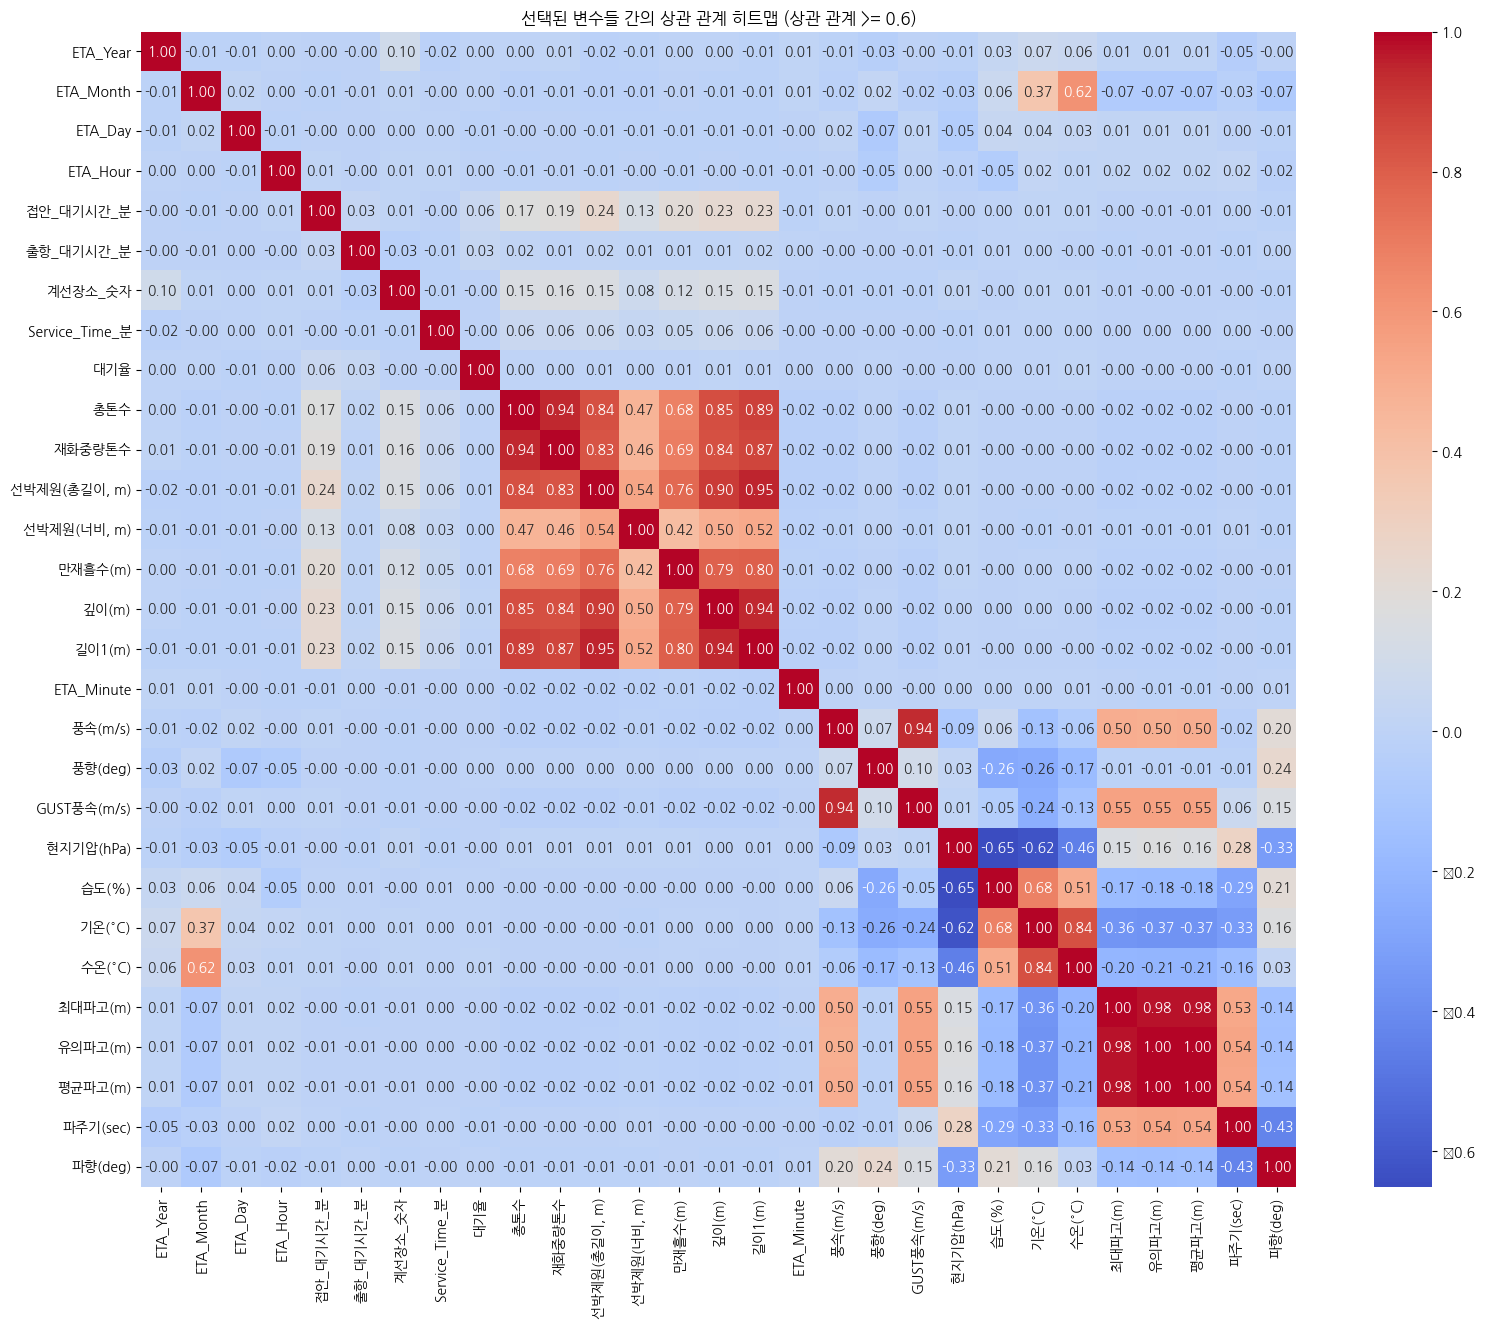

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 'PET 총량' 변수와의 상관 관계가 0.6 이상인 변수
correlation_threshold = 0
correlation_with_pet = AC.corr()['접안_대기시간_분']
selected_variables = [col for col in correlation_with_pet.index if abs(correlation_with_pet[col]) >= correlation_threshold]

# 선택된 변수들 간의 상관 관계 히트맵
df_selected = AC[selected_variables]
correlation_matrix = df_selected.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('선택된 변수들 간의 상관 관계 히트맵 (상관 관계 >= 0.6)')
plt.show()

In [12]:
sorted_AC = AC.sort_values(by='대기율', ascending=True)

sorted_AC.head(5)

,Datetime,ETA_Year,ETA_Month,ETA_Day,ETA_Hour,호출부호,입항일시,출항일시,접안_대기시간_분,출항_대기시간_분,Service_Time_Start,Service_Time_End,계선장소_코드,계선장소_숫자,계선장소명,선박용도,Service_Time_분,대기율,총톤수,재화중량톤수,"선박제원(총길이, m)","선박제원(너비, m)",만재흘수(m),깊이(m),길이1(m),ETA_Minute,풍속(m/s),풍향(deg),GUST풍속(m/s),현지기압(hPa),습도(%),기온(°C),수온(°C),최대파고(m),유의파고(m),평균파고(m),파주기(sec),파향(deg),액체화물
12194,2020-09-26 07:00:00,2020,9,26,7,200013,2020-09-26 07:30:00,2020-09-28 01:40,2010,1500.0,2020-09-27 17:00:00,2020-09-27 01:00:00,WAM,1,정박지-M1,석유제품 운반선,-960.0,-209.375000,1998.0,3612.258,79.99,14.0,6.0,7.30,79.99,30,12.7,5.0,16.7,1012.0,81.0,20.6,21.9,5.55,3.5,2.5,8.0,25.0,1
5061,2020-04-18 04:00:00,2020,4,18,4,192827,2020-04-18 04:20:00,2020-04-19 18:25,1780,1650.0,2020-04-19 10:00:00,2020-04-18 16:30:00,WAM,2,정박지-M2,석유제품 운반선,-1050.0,-169.523810,1998.0,3612.258,79.99,14.0,5.8,7.30,79.99,20,2.2,307.0,3.3,1010.1,80.0,15.1,15.9,1.90,1.1,0.8,6.4,197.0,1
1503,2020-02-01 22:00:00,2020,2,1,22,88238,2020-02-01 22:10:00,2020-02-03 05:25,1490,1300.0,2020-02-02 23:00:00,2020-02-02 08:20:00,MLJ,1,장생포호안,석유제품 운반선,-880.0,-169.318182,700.0,0.000,70.90,12.0,3.9,5.35,66.01,10,8.5,315.0,10.8,1024.3,50.0,9.2,16.1,3.40,2.2,1.6,10.7,49.0,1
34367,2022-01-09 12:00:00,2022,1,9,12,124810,2022-01-09 12:00:00,2022-01-10 22:25,1665,125.0,2022-01-10 15:45:00,2021-01-10 20:20:00,MLJ,1,장생포호안,석유제품 운반선,-525325.0,-0.316947,1130.0,2286.000,57.00,10.0,5.0,5.95,74.00,0,4.4,4.0,7.3,1021.5,64.0,11.2,15.7,1.90,1.3,0.9,7.1,45.0,1
0,2020-01-01 01:00:00,2020,1,1,1,88238,2020-01-01 01:05:00,2020-01-01 08:15,0,0.0,2020-01-01 01:05:00,2020-01-01 08:15:00,MBU,1,SK2부두 01,석유제품 운반선,430.0,0.000000,700.0,0.000,70.90,12.0,3.9,5.35,66.01,5,9.3,330.0,12.2,1028.8,43.0,4.3,17.5,4.20,2.8,2.0,10.7,49.0,1


In [13]:
percentage_to_drop = int(len(sorted_AC) * 0.005)
PER1_AC = sorted_AC[percentage_to_drop:-percentage_to_drop]



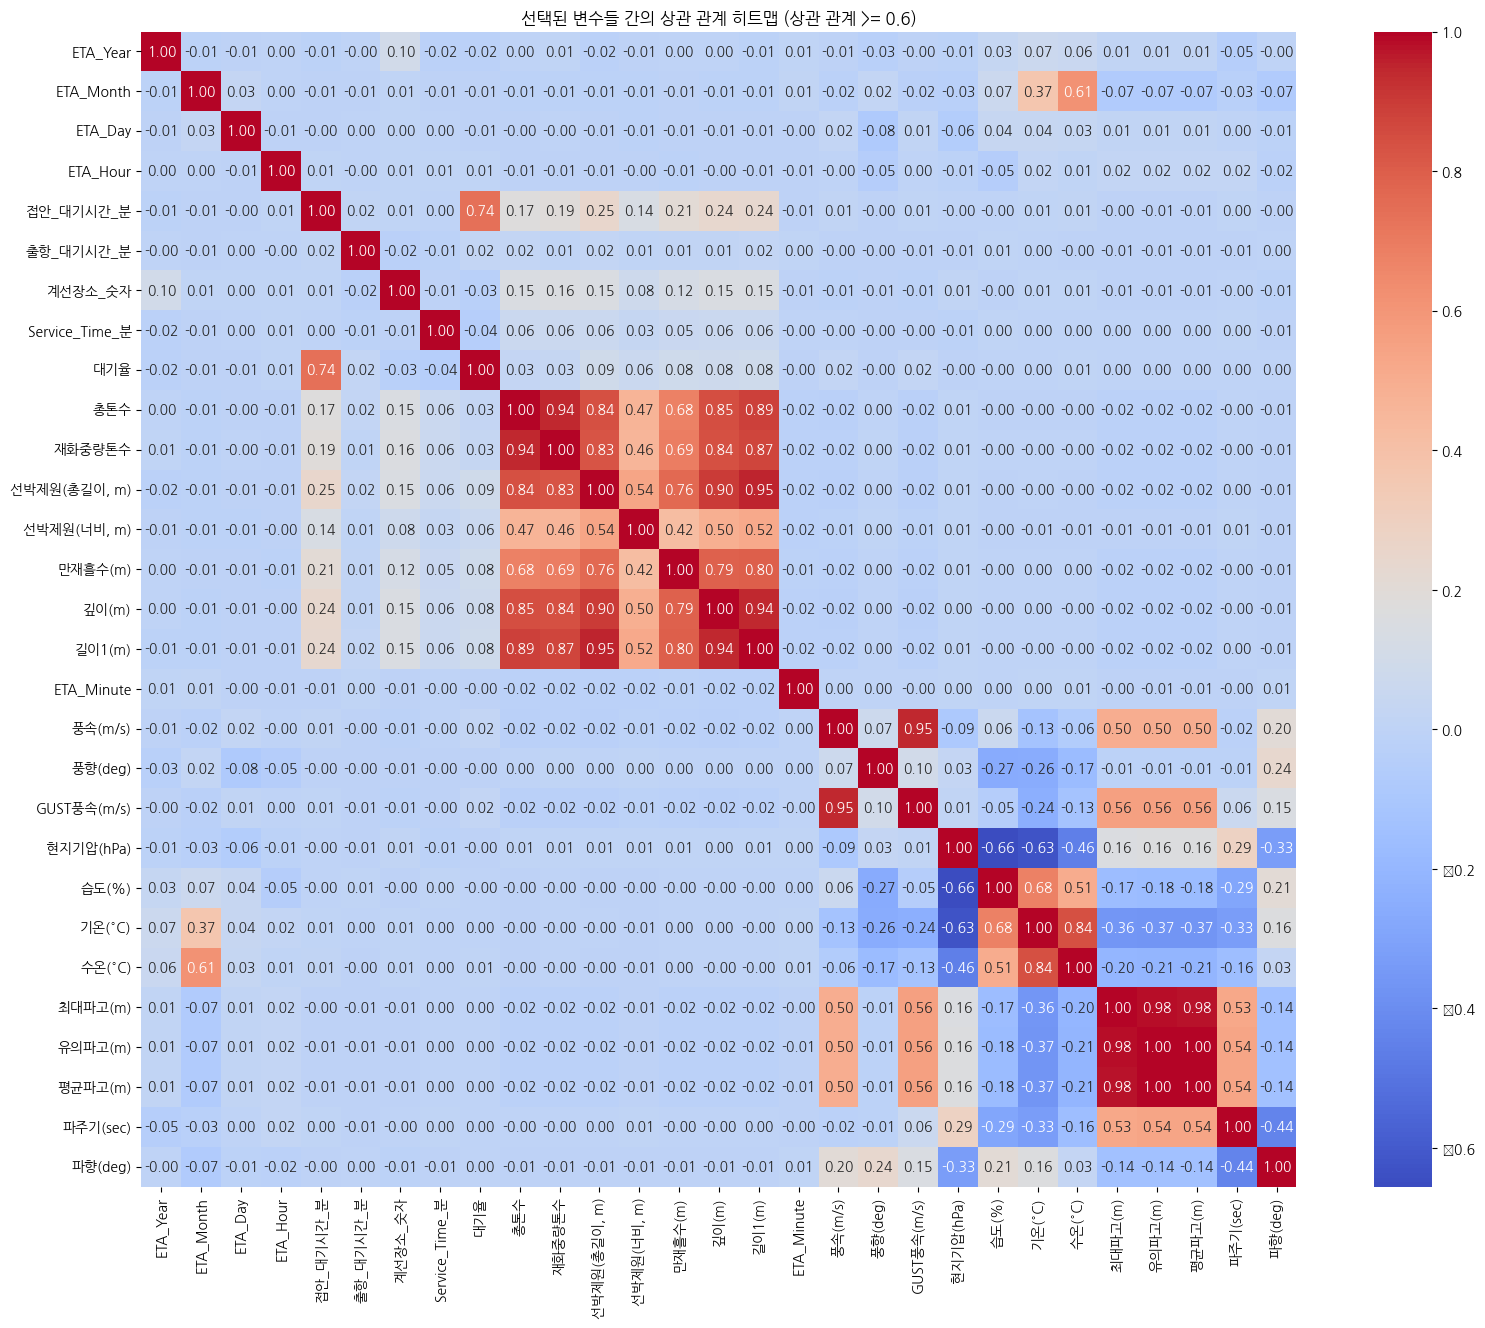

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 'PET 총량' 변수와의 상관 관계가 0.6 이상인 변수
correlation_threshold = 0
correlation_with_pet = PER1_AC.corr()['접안_대기시간_분']
selected_variables = [col for col in correlation_with_pet.index if abs(correlation_with_pet[col]) >= correlation_threshold]

# 선택된 변수들 간의 상관 관계 히트맵
df_selected = PER1_AC[selected_variables]
correlation_matrix = df_selected.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('선택된 변수들 간의 상관 관계 히트맵 (상관 관계 >= 0.6)')
plt.show()